# Hito 3 Resultados

- Implementación: Usando Python 3, se logró cargar la imagen para empezar su manejo en escala de grises, esto se hace mediante una función que se exporta de la librería PIL:

In [1]:
from PIL import Image
# Cargar la imagen para traspasarla a escala de grises 
img = Image.open('halo.tif').convert('L')

- Implementación: Una vez que se obtuvo la imagen en escala de grises, esta se debe guadar con la función save(), en donde le otorgo un nombre a mi nueva imagen en formato "png"

In [2]:
# Guardar la imagen con formato png
img.save('halosgris.png','png')
print(img)

<PIL.Image.Image image mode=L size=906x468 at 0x10C460310>


- Resultados: se logró crear una nueva imagen en escala de grises con un tamaño de 424.008 píxeles en total. Esta imagen obtenida, es una imagen bidimensional dividida en 469 píxeles de alto y  906 de ancho. 

- Implementación: Una vez guardada la imagen en escala de grises se lee mediante la función imread(), que se importa de la librería skimage. 

In [3]:
from skimage import io
halo_gris = io.imread('halosgris.png')
print(halo_gris)

[[116 116 116 ... 133 134 133]
 [118 118 118 ... 133 133 133]
 [118 118 118 ... 133 133 132]
 ...
 [155 155 153 ... 136 136 135]
 [155 155 153 ... 136 135 137]
 [154 153 153 ... 134 133 136]]


- **Shape** para obtener la forma de la imagen

In [4]:
halo_gris.shape

(468, 906)

- **Size** para obtener el número total de píxeles

In [5]:
halo_gris.size

424008

**Definiremos funciones para mostrar las imgagenes con maltplotlib**

- Implementación: Para no estar en todo momento escribiendo comandos para mostrar o comparar dos imágenes, se definen dos funciones con librería matplotlib que nos sirve para mostrar imágenes mediante funciones.

        - Se crea la función show_image para mostrar la imagen que uno estime conveniente con un tipo de imagen gris y título.

In [6]:
from matplotlib import pyplot as plt

def show_image(image, title='Image', cmap_type='gray'): 
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

        - Se crea la función plot_comparison para mostrar dos imágenes, una sería la original y la otra con algún filtro o método aplicado y así poder comparar ambas imágenes.

In [7]:
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, 
                                   figsize=(15, 13), 
                                   sharex=True, 
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray) 
    ax1.set_title('original') 
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray) 
    ax2.set_title(title_filtered) 
    ax2.axis('off')

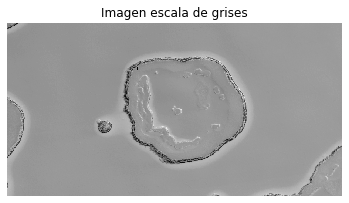

In [8]:
show_image(halo_gris, "Imagen escala de grises")

In [9]:
import numpy as np
# Cargar la imagen usando Matplotlib
halo_image = io.imread('halo.tif') 
type(halo_image)

numpy.ndarray

**Una imagen de color es una matriz NumPy con 3 dimensiones para canales de color RGB y se pueden obtener por separados.
En este caso la imagen es de tipo de dato objeto ndarray (numpy) debido a que las imágenes pueden representarse mediantematrices multidimensionales.**

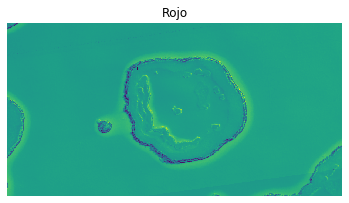

[[122 121 121 ... 142 142 141]
 [124 124 124 ... 141 142 142]
 [125 125 125 ... 142 141 141]
 ...
 [166 166 165 ... 136 136 135]
 [166 166 165 ... 136 135 137]
 [165 164 165 ... 134 133 136]]


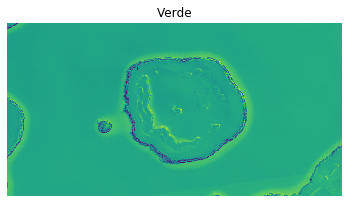

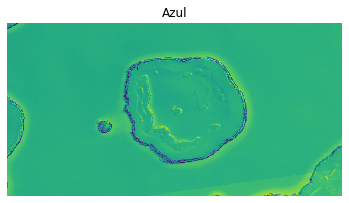

In [10]:
# Obteniendo los valores rojos de la imagen
red = halo_image[:, :, 0]
plt.imshow(red) 
plt.title('Rojo') 
plt.axis('off')
plt.show()
print(red)
# Obteniendo los valores verdes de la imagen
green = halo_image[:, :, 1]
plt.imshow(green) 
plt.title('Verde') 
plt.axis('off')
plt.show()
# Obteniendo los valores azules de la imagen
blue = halo_image[:, :, 2]
plt.imshow(blue) 
plt.title('Azul') 
plt.axis('off')
plt.show()

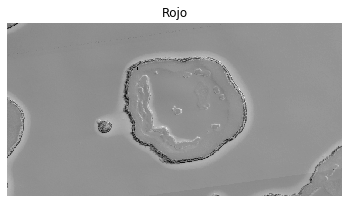

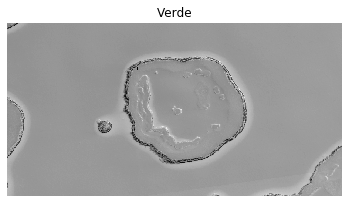

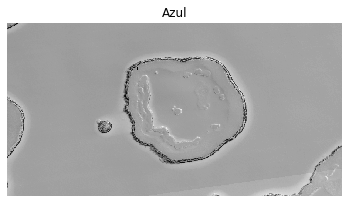

In [11]:
show_image(red, 'Rojo')
show_image(green, 'Verde')
show_image(blue, 'Azul')

# Histogramas
El histograma en una imagen es una representación gráfica de la cantidad de píxeles de cada valor de intensidad.
De 0 (negro puro) a 255 (blanco puro)

- Implementación: Matplotlib tiene un método que toma una matriz de entrada (frecuencia) y bins como parámetros, donde los elementos sucesivos en la matriz binaria actúan como el límite de cada bin.
Establecemos bins = 256 porque mostraremos el número de píxeles para cada valor de píxel, es decir, de 0 a 255.

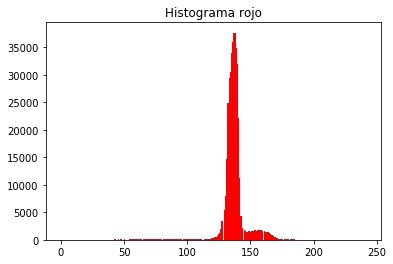

In [12]:
# Obtener el histograma rojo
plt.hist(red.ravel(), color= 'r', bins=256)
plt.title('Histograma rojo')
plt.show()

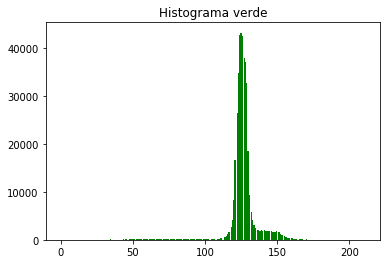

In [13]:
# Obtener el histograma verde
plt.hist(green.ravel(), color= 'g', bins=256)
plt.title('Histograma verde')
plt.show()

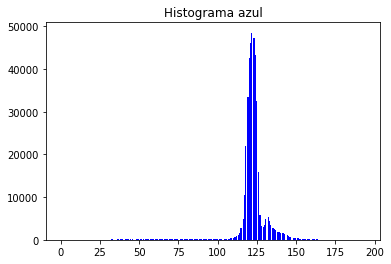

In [14]:
# Obtener el histograma azul
plt.hist(blue.ravel(),color= 'b', bins=256)
plt.title('Histograma azul')
plt.show()

# Umbralización / Thresholding

El umbral se usa para dividir el fondo y primer plano de las imágenes en escala de grises, escencialmente haciéndolas en blanco y negro. 

Comparamos cada píxel con un valor de umbral dado:

    255(blanco) si el píxel > valor de umbral
    0(negro) si el píxel < valor de umbral
    
Es el método mas simple de segmentación de imágenes. La imagen resultante es BINARIA

- Permite aislar elementos y se utiliza en la detección de objetos, reconocimiento facial y otras aplicaciones.
- Funciona mejor en imágenes de alto contraste en escala de grises.

**Para poner en umbral imágenes en color, primero debemos convertiras a escala de grises.**

In [15]:
# Obtener valor umbral optimo
thresh = 98
print("umbral:", thresh)

umbral: 98


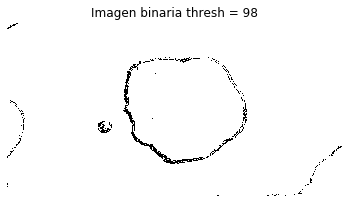

In [16]:
# Aplicamos el umbral a la imagen
binary = halo_gris > thresh
# Mostrar la imagen 
show_image(binary, "Imagen binaria thresh = 98")

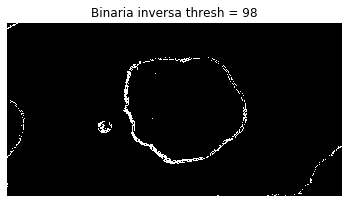

In [17]:
# Aplicamos el umbral invertido a la imagen
inverted_binary = halo_gris <= thresh
# Mostrar la imagen 
show_image(inverted_binary, "Binaria inversa thresh = 98")

## Try_all_threshold

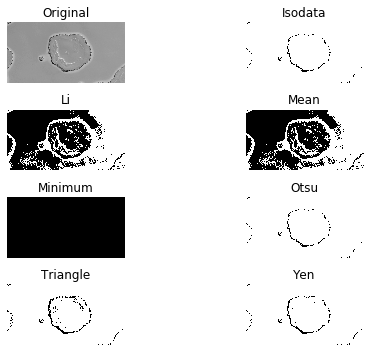

In [18]:
from skimage.filters import try_all_threshold 
from matplotlib.pyplot import *
#Obtengo todas las imagenes resultantes
fig, ax = try_all_threshold(halo_gris, verbose=False)
# Mostrando resultados plots
plt.show(fig, ax)

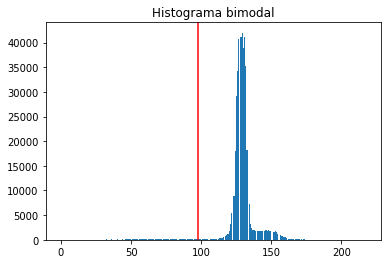

In [19]:
ax[1] = plt.subplot()
ax[1].hist(halo_gris.ravel(), bins=256)
ax[1].set_title('Histograma bimodal')
ax[1].axvline(thresh, color='r')
plt.show()

## Threshold_otsu (Global)

98


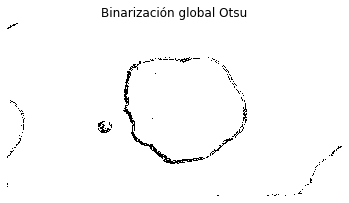

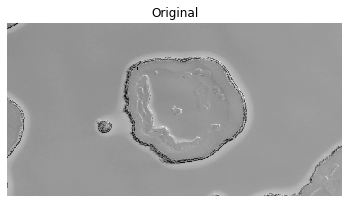

(468, 906)


In [20]:
# Importo la función threshold_otsu  
from skimage.filters import threshold_otsu 
# Obtengo el valor de umbral óptimo
thresh = threshold_otsu(halo_gris)
print(thresh)
# Aplico thresholding a la imagen
binary_global = halo_gris > thresh
# Mostrar imagen original y binarizada
show_image(binary_global, 'Binarización global Otsu')
show_image(halo_gris, 'Original')
print(binary_global.shape)

# Detección de bordes

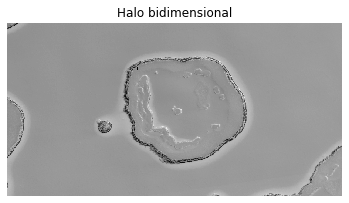

In [21]:
from skimage.color import rgb2gray
halo_gris = rgb2gray(halo_image)
show_image(halo_gris, 'Halo bidimensional')

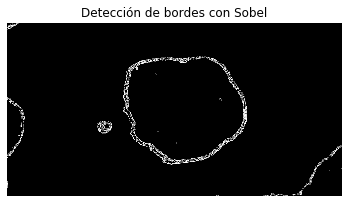

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
from skimage.filters import sobel 
# Aplico filtro sobel detección de bordes
edge_sobel = sobel(binary_global)
# Comparo
show_image(edge_sobel, "Detección de bordes con Sobel")
print(edge_sobel)

## Find_contours( )

In [23]:
from skimage import measure
# Construct some test data
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))
# Encuentra contornos a un valor constante de 0.8
contours = measure.find_contours(binary_global, 0.8)

In [24]:
for contour in contours: 
    print(contour.shape)
    

(78, 2)
(50, 2)
(7, 2)
(5, 2)
(7, 2)
(9, 2)
(9, 2)
(15, 2)
(5, 2)
(17, 2)
(7, 2)
(9, 2)
(9, 2)
(11, 2)
(17, 2)
(13, 2)
(5, 2)
(27, 2)
(13, 2)
(9, 2)
(223, 2)
(65, 2)
(7, 2)
(7, 2)
(5, 2)
(5, 2)
(13, 2)
(5, 2)
(23, 2)
(17, 2)
(9, 2)
(61, 2)
(33, 2)
(259, 2)
(5, 2)
(89, 2)
(13, 2)
(9, 2)
(41, 2)
(7, 2)
(5, 2)
(5, 2)
(7, 2)
(5, 2)
(7, 2)
(5, 2)
(5, 2)
(9, 2)
(27, 2)
(5, 2)
(15, 2)
(43, 2)
(7, 2)
(9, 2)
(7, 2)
(2585, 2)
(63, 2)
(9, 2)
(7, 2)
(79, 2)
(5, 2)
(11, 2)
(21, 2)
(7, 2)
(31, 2)
(13, 2)
(9, 2)
(27, 2)
(5, 2)
(9, 2)
(21, 2)
(5, 2)
(23, 2)
(13, 2)
(105, 2)
(31, 2)
(5, 2)
(5, 2)
(5, 2)
(15, 2)
(9, 2)
(5, 2)
(35, 2)
(5, 2)
(67, 2)
(5, 2)
(7, 2)
(13, 2)
(17, 2)
(5, 2)
(9, 2)
(5, 2)
(29, 2)
(25, 2)
(11, 2)
(15, 2)
(7, 2)
(19, 2)
(25, 2)
(7, 2)
(5, 2)
(31, 2)
(15, 2)
(5, 2)
(5, 2)
(5, 2)
(9, 2)
(9, 2)
(7, 2)
(11, 2)
(13, 2)
(51, 2)
(7, 2)
(47, 2)
(5, 2)
(5, 2)
(5, 2)
(7, 2)
(5, 2)
(27, 2)
(15, 2)
(21, 2)
(19, 2)
(7, 2)
(7, 2)
(9, 2)
(21, 2)
(61, 2)
(5, 2)
(5, 2)
(11, 2)
(23, 2)
(23, 2)
(3

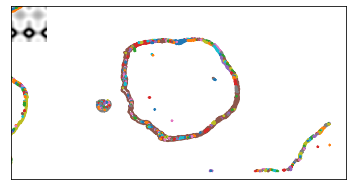

In [25]:
# Mostrar la imagen y trazar todos los contornos encontrados
fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

# Encontrar los bordes con Canny

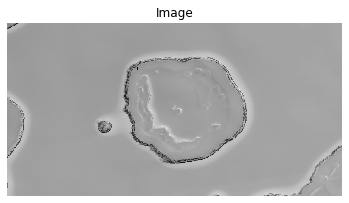

In [26]:
from skimage.restoration import denoise_bilateral 
# Aplicar filtro de eliminación de ruido bilateral
halosinruido = denoise_bilateral(halo_gris, multichannel=False)
show_image(halosinruido)

### CANNY SIGMA DE 1

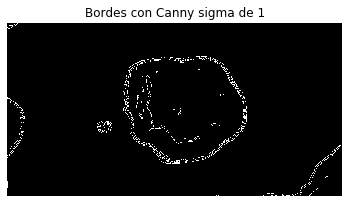

In [27]:
from skimage.feature import canny
# Aplicar detector canny
canny_edges = canny(halosinruido)
# Mostrar
show_image(canny_edges, "Bordes con Canny sigma de 1")

In [35]:
print(canny_edges)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


### CANNY SIGMA DE 0.5

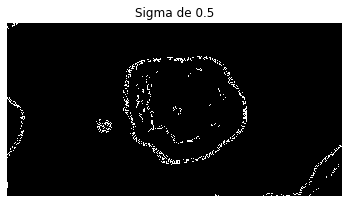

In [29]:
# Aplicar detector Canny con un sigma de 0.5
canny_edges_0_5 = canny(halosinruido, sigma=0.5)
# Mostrar
show_image(canny_edges_0_5, "Sigma de 0.5")

In [30]:
print(canny_edges_0_5.shape)
print(canny_edges_0_5)

(468, 906)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


# Harris corner detector

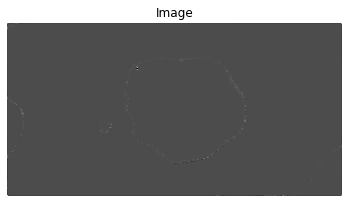

In [31]:
from skimage.feature import corner_harris 
# convertir escala de grises
image = rgb2gray(halo_gris)
# Aplicar detector de esquinas Hariis en la imagen
measure_image = corner_harris(halo_gris)
# mostrar
show_image(measure_image)

In [32]:
from skimage.feature import corner_peaks
# Encuentra las coordenadas de las esquinas
coords = corner_peaks(corner_harris(canny_edges), min_distance=5) 
print("Un total de", len(coords), "esquinas fueron detectadas.")  

Un total de 173 esquinas fueron detectadas.


In [33]:
# Funcion para mostrar imagen con esquinas
def show_image_with_corners(image, coords, title="Corners detected"): 
    plt.imshow(image, interpolation='nearest', cmap='gray') 
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15) 
    plt.axis('off')
    plt.show()

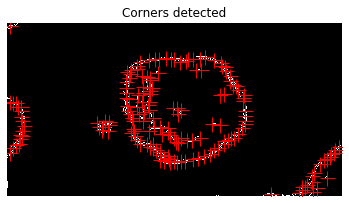

In [34]:
# Mostrar imagen con marcas en las esquinas detectadas
show_image_with_corners(canny_edges, coords)